In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df=pd.read_csv("C:/Min/graduate/공모전/관광데이터분석/2023년_외래관광객조사_데이터/2023 외래관광객조사 DATA.csv" ,encoding='cp949')

C:\Temp\ipykernel_18148\1846897922.py:7: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:/Min/graduate/공모전/관광데이터분석/2023년_외래관광객조사_데이터/2023 외래관광객조사 DATA.csv" ,encoding='cp949')


# 전처리

In [281]:
cols=df.columns
pd.set_option('display.max_seq_items', None)
cols #컬럼 다 보이게 셋팅

Index(['pnid', 'MVIT', 'RVIT', 'XRVIT', 'TYP', 'Q1', 'Q1_1a1', 'Q1_1a2',
       'Q1_1a3', 'Q2a1', 'Q2a2', 'Q2a3', 'Q2a_dk', 'Q2_1a1', 'Q2_1a2',
       'Q2_1a3', 'Q3_1a1', 'Q3_1a2', 'Q3_1a3', 'Q3_2a1', 'Q3_2a2', 'Q3_2a3',
       'Q4a1', 'Q4a2', 'Q4a3', 'Q4a_dk', 'Q4_1a1', 'Q4_1a2', 'Q4_1a3',
       'Q4_2a1', 'Q4_2a2', 'Q4_2a3', 'Q4_2a_dk', 'Q5', 'Q5_1a01', 'Q5_1a02',
       'Q5_1a03', 'Q5_1a04', 'Q5_1a05', 'Q5_1a06', 'Q5_1a07', 'Q5_1a08',
       'Q5_1a09', 'Q5_1a10', 'Q5_1a99', 'Q7A', 'Q7a_dk', 'Q7a2', 'Q7a3',
       'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8', 'MQ7_1', 'MQ7_1제외', 'MQ7_2',
       'MQ7_1$15제외', 'MQ7_1제외$15제외', 'RQ7_1', 'RQ7_1제외', 'RQ7_2', 'RQ7_1$15제외',
       'RQ7_1제외$15제외', 'Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06',
       'Q8a07', 'Q8a08', 'Q8a09', 'Q8a10', 'Q8a11', 'Q8a12', 'Q8a13', 'Q8a14',
       'Q8a15', 'Q8a16', 'Q8a17', 'Q8a18', 'Q8a19', 'Q8_1a1', 'Q8_1a2',
       'Q8_1a3', 'Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5', 'Q9_2a01',
       'Q9_2a02', 'Q9_2

In [282]:
#군집화에 필요한 변수 생성(연관분석 전)
cols=['Q1', 'Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8','Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06',
       'Q8a07', 'Q8a08', 'Q8a09', 'Q8a10', 'Q8a11', 'Q8a12', 'Q8a13', 'Q8a14',
       'Q8a15', 'Q8a16', 'Q8a17', 'Q8a18', 'Q8a19','M박HAP','숙박비1인대체', '음식점1인대체', '식음료1인대체', '문화서1인대체',  '쇼핑비1인대체', '치료및1인대체', '미용서1인대체'
      ,'D_MON', 'D_SEX','D_AGE','MQ10_2b01', 'MQ10_2b02', 'MQ10_2b03',
       'MQ10_2b04', 'MQ10_2b05', 'MQ10_2b06', 'MQ10_2b07', 'MQ10_2b08',
       'MQ10_2b09', 'MQ10_2b10', 'MQ10_2b11', 'MQ10_2b12', 'MQ10_2b13','Q10_2a01', 'Q10_2a02', 'Q10_2a03', 'Q10_2a04', 'Q10_2a05',
       'Q10_2a06', 'Q10_2a07', 'Q10_2a08', 'Q10_2a09', 'Q10_2a10', 'Q10_2a11',
       'Q10_2a12', 'Q10_2a13','weight']

In [283]:
df1=df[cols].reset_index(drop=True) #df1 ; 필요한 변수만 뽑은 df
df1.head()
df1.dtypes

Q1             int64
Q7a_dk       float64
Q7a2         float64
Q7a3         float64
Q7a4         float64
Q7a5         float64
Q7a6         float64
Q7a7         float64
Q7a8         float64
Q8a01        float64
Q8a02        float64
Q8a03        float64
Q8a04        float64
Q8a05        float64
Q8a06        float64
Q8a07        float64
Q8a08        float64
Q8a09        float64
Q8a10        float64
Q8a11        float64
Q8a12        float64
Q8a13        float64
Q8a14        float64
Q8a15        float64
Q8a16        float64
Q8a17        float64
Q8a18        float64
Q8a19        float64
M박HAP        float64
숙박비1인대체      float64
음식점1인대체      float64
식음료1인대체      float64
문화서1인대체      float64
쇼핑비1인대체      float64
치료및1인대체      float64
미용서1인대체      float64
D_MON        float64
D_SEX        float64
D_AGE        float64
MQ10_2b01    float64
MQ10_2b02    float64
MQ10_2b03    float64
MQ10_2b04    float64
MQ10_2b05    float64
MQ10_2b06    float64
MQ10_2b07    float64
MQ10_2b08    float64
MQ10_2b09    

In [284]:
df1.shape

(16196, 66)

# 의료관광객만

In [285]:
mf=df1[df1['Q8a13'].notnull()].reset_index(drop=True)
mf.head() #mf : 의료관광객들의 df 

,Q1,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,M박HAP,숙박비1인대체,음식점1인대체,식음료1인대체,문화서1인대체,쇼핑비1인대체,치료및1인대체,미용서1인대체,D_MON,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,MQ10_2b07,MQ10_2b08,MQ10_2b09,MQ10_2b10,MQ10_2b11,MQ10_2b12,MQ10_2b13,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,weight
0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,1.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.43
1,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,4.0,5.0,6.0,NaN,NaN,NaN,10.0,NaN,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,1.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244.84
2,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,1.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,30.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,5.0,NaN,7.0,NaN,9.0,NaN,NaN,NaN,NaN,299.59
3,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,1.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153.27
4,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.02


In [286]:
mf.shape #의료관광객 640명 

(640, 66)

In [287]:
mf.dtypes #데이터타입 안맞음 

Q1             int64
Q7a_dk       float64
Q7a2         float64
Q7a3         float64
Q7a4         float64
Q7a5         float64
Q7a6         float64
Q7a7         float64
Q7a8         float64
Q8a01        float64
Q8a02        float64
Q8a03        float64
Q8a04        float64
Q8a05        float64
Q8a06        float64
Q8a07        float64
Q8a08        float64
Q8a09        float64
Q8a10        float64
Q8a11        float64
Q8a12        float64
Q8a13        float64
Q8a14        float64
Q8a15        float64
Q8a16        float64
Q8a17        float64
Q8a18        float64
Q8a19        float64
M박HAP        float64
숙박비1인대체      float64
음식점1인대체      float64
식음료1인대체      float64
문화서1인대체      float64
쇼핑비1인대체      float64
치료및1인대체      float64
미용서1인대체      float64
D_MON        float64
D_SEX        float64
D_AGE        float64
MQ10_2b01    float64
MQ10_2b02    float64
MQ10_2b03    float64
MQ10_2b04    float64
MQ10_2b05    float64
MQ10_2b06    float64
MQ10_2b07    float64
MQ10_2b08    float64
MQ10_2b09    

# 요인분석 (안함)

In [288]:
#요인분석 패키지 설치 (완료)
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns
import pandas as pd


#우선 고려한 관광활동들을 기준으로 요인분석 실행 (의료관광 데이터이기에 Q8a13 제외)
ar1=mf[['Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06',
       'Q8a07', 'Q8a08', 'Q8a09', 'Q8a10', 'Q8a11', 'Q8a12', 'Q8a13', 'Q8a14',
       'Q8a15', 'Q8a16', 'Q8a17', 'Q8a18', 'Q8a19']].fillna(0) #결측치 0으로 대체 
#fa1[fa1!=0]=1
#fa1=fa1.drop(['Q8a13','Q8a01'], axis=1)

#원핫인코딩 실시 
def one(x): 
    return 1 if x!=0 else 0

ar1_1=ar1.applymap(one)

# 연관규칙

In [289]:
#연관규칙분석 해보기 (어떤 활동끼리 주로 같이 체험하는지?)
from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_rows', None) #다 추출되게하는 옵션 
rules=association_rules(apriori(ar1_1, min_support=0.1, use_colnames=True),metric='lift', min_threshold=1, support_only=False)
rules.sort_values('support', ascending=False)

#대전제 :  support(지지도) lift(향상도) confidence(신뢰도) 다 높은게 우월 
#기본아이템이면 confidence가 1이 됨 
#confidence - 연관규칙의 강도 (생성된 규칙이 얼마나 유용한지)
#lift - 사용해볼 가능성 (생성 규칙이 얼마나 유용?)
#support - 사용 시 효과 가능성 (빈번히 등장하는 집합)



C:\Users\gram\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33,(Q8a13),(Q8a02),1.000000,0.837500,0.837500,0.837500,1.000000,0.000000,1.000000,0.000000
32,(Q8a02),(Q8a13),0.837500,1.000000,0.837500,1.000000,1.000000,0.000000,inf,0.000000
14,(Q8a13),(Q8a01),1.000000,0.582812,0.582812,0.582812,1.000000,0.000000,1.000000,0.000000
15,(Q8a01),(Q8a13),0.582812,1.000000,0.582812,1.000000,1.000000,0.000000,inf,0.000000
0,(Q8a02),(Q8a01),0.837500,0.582812,0.526563,0.628731,1.078788,0.038457,1.123681,0.449441
1,(Q8a01),(Q8a02),0.582812,0.837500,0.526563,0.903485,1.078788,0.038457,1.683681,0.175063
109,(Q8a01),"(Q8a02, Q8a13)",0.582812,0.837500,0.526563,0.903485,1.078788,0.038457,1.683681,0.175063
108,(Q8a02),"(Q8a01, Q8a13)",0.837500,0.582812,0.526563,0.628731,1.078788,0.038457,1.123681,0.449441
107,(Q8a13),"(Q8a02, Q8a01)",1.000000,0.526563,0.526563,0.526563,1.000000,0.000000,1.000000,0.000000
106,"(Q8a02, Q8a01)",(Q8a13),0.526563,1.000000,0.526563,1.000000,1.000000,0.000000,inf,0.000000


In [290]:
ar2=mf[['Q10_2a01', 'Q10_2a02', 'Q10_2a03', 'Q10_2a04', 'Q10_2a05',
       'Q10_2a06', 'Q10_2a07', 'Q10_2a08', 'Q10_2a09', 'Q10_2a10', 'Q10_2a11',
       'Q10_2a12', 'Q10_2a13']].fillna(0) #결측치 0으로 대체 
#fa1[fa1!=0]=1
#fa1=fa1.drop(['Q8a13','Q8a01'], axis=1)

def one(x): 
    return 1 if x!=0 else 0

ar2_1=ar2.applymap(one)

#연관규칙분석 해보기 (어떤 활동끼리 주로 같이 체험하는지?)
from matplotlib.colors import LinearSegmentedColormap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_rows', None)
rules=association_rules(apriori(ar2_1, min_support=0.1, use_colnames=True),metric='lift', min_threshold=1, support_only=False)
rules.sort_values('support', ascending=False)


#해석 : Q10a07부터 제거 

C:\Users\gram\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Q10_2a03),(Q10_2a01),0.601562,0.628125,0.396875,0.659740,1.050333,0.019019,1.092915,0.120272
3,(Q10_2a01),(Q10_2a03),0.628125,0.601562,0.396875,0.631841,1.050333,0.019019,1.082242,0.128863
10,(Q10_2a03),(Q10_2a02),0.601562,0.368750,0.251563,0.418182,1.134052,0.029736,1.084961,0.296675
11,(Q10_2a02),(Q10_2a03),0.368750,0.601562,0.251563,0.682203,1.134052,0.029736,1.253750,0.187258
1,(Q10_2a01),(Q10_2a02),0.628125,0.368750,0.232813,0.370647,1.005144,0.001191,1.003014,0.013761
0,(Q10_2a02),(Q10_2a01),0.368750,0.628125,0.232813,0.631356,1.005144,0.001191,1.008764,0.008107
12,(Q10_2a03),(Q10_2a04),0.601562,0.237500,0.193750,0.322078,1.356118,0.050879,1.124761,0.659077
13,(Q10_2a04),(Q10_2a03),0.237500,0.601562,0.193750,0.815789,1.356118,0.050879,2.162946,0.344395
21,(Q10_2a03),"(Q10_2a02, Q10_2a01)",0.601562,0.232813,0.160938,0.267532,1.149133,0.020886,1.047401,0.325719
5,(Q10_2a04),(Q10_2a01),0.237500,0.628125,0.160938,0.677632,1.078816,0.011758,1.153571,0.095814


In [291]:
#하단 규칙에서 언급되지 않는 컬럼 제거 
#Q8a 08, 09, 14, 15, 16, 17,18,19 
#⑧ 연극, 뮤지컬, 발레 등 공연 관람 □
#⑨ 지역 축제 참여□
#⑭ 스포츠/레포츠 관람 (야구, 축구, 농구 등) □
#⑮ 스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등) □
#⑯ 국제회의(컨벤션, 국제회의, 전시 등) □
#⑰ 비즈니스 전문활동(업무회의, 산업시설 시찰 등) □
#⑱ 연수, 교육, 연구□
#◯ 19 기타 :  _____________________ □

#식도락(음식/미식) 관광
#쇼핑
#자연경관 감상
#고궁/역사 유적지 방문
#전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)
#박물관, 전시관 관람
#K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문
#유흥(나이트라이프 활동 및 카지노 등)
#오락(놀이공원 및 테마파크 방문 등)
#뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)
#치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)

#규칙성 없는 활동 및 소비 품목별 비중 같이 제거 (품목별 금액도)
mf.drop(columns=['Q8a08','Q8a09','Q8a14','Q8a15','Q8a16','Q8a17','Q8a18','Q8a19'
                 ,'Q10_2a01', 'Q10_2a02', 'Q10_2a03', 'Q10_2a04', 'Q10_2a05', 'Q10_2a06', 'Q10_2a07', 'Q10_2a08', 'Q10_2a09', 'Q10_2a10', 'Q10_2a11', 'Q10_2a12', 'Q10_2a13','MQ10_2b07', 'MQ10_2b08', 'MQ10_2b09', 'MQ10_2b10', 'MQ10_2b11', 'MQ10_2b12', 'MQ10_2b13'], inplace=True)

In [292]:
mf.head()

,Q1,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,Q8a13,M박HAP,숙박비1인대체,음식점1인대체,식음료1인대체,문화서1인대체,쇼핑비1인대체,치료및1인대체,미용서1인대체,D_MON,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,weight
0,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,1.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,193.43
1,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,4.0,5.0,6.0,NaN,10.0,NaN,12.0,13.0,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,1.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,244.84
2,1,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,1.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,299.59
3,2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,1.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,153.27
4,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,245.02


In [293]:
mf.shape

(640, 38)

In [294]:
#동반자 수 변수 재범주화 실시 
mf.loc[(mf['Q7a_dk'].notnull() ), 'Mem'] = '1' 

In [295]:
mf.Mem

0        1
1        1
2      NaN
3        1
4        1
5        1
6        1
7      NaN
8      NaN
9      NaN
10     NaN
11       1
12       1
13     NaN
14       1
15       1
16       1
17       1
18     NaN
19     NaN
20     NaN
21       1
22       1
23     NaN
24       1
25       1
26       1
27       1
28     NaN
29     NaN
30       1
31       1
32     NaN
33       1
34     NaN
35       1
36     NaN
37     NaN
38     NaN
39     NaN
40       1
41       1
42       1
43       1
44       1
45     NaN
46       1
47       1
48     NaN
49       1
50     NaN
51     NaN
52       1
53     NaN
54     NaN
55       1
56       1
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65       1
66       1
67       1
68     NaN
69     NaN
70       1
71     NaN
72     NaN
73       1
74       1
75       1
76     NaN
77     NaN
78     NaN
79     NaN
80       1
81       1
82       1
83       1
84     NaN
85       1
86       1
87     NaN
88       1
89       1
90     NaN

In [296]:
mf.loc[(mf['Q7a3'].notnull())|(mf['Q7a4'].notnull())|(mf['Q7a5'].notnull()), 'Mem'] = '2' 
mf.Mem

0        1
1        1
2        2
3        1
4        1
5        1
6        1
7      NaN
8        2
9      NaN
10     NaN
11       1
12       1
13       2
14       1
15       1
16       1
17       1
18     NaN
19       2
20     NaN
21       1
22       1
23     NaN
24       1
25       1
26       1
27       1
28       2
29       2
30       1
31       1
32       2
33       1
34       2
35       1
36       2
37     NaN
38     NaN
39       2
40       1
41       1
42       1
43       1
44       1
45     NaN
46       1
47       1
48     NaN
49       1
50       2
51     NaN
52       1
53     NaN
54       2
55       1
56       1
57       2
58     NaN
59     NaN
60     NaN
61       2
62       2
63       2
64     NaN
65       1
66       1
67       1
68     NaN
69     NaN
70       1
71     NaN
72       2
73       1
74       1
75       1
76       2
77       2
78     NaN
79       2
80       1
81       1
82       1
83       1
84     NaN
85       1
86       1
87       2
88       1
89       1
90     NaN

In [297]:
mf.loc[((mf['Q7a2'].notnull())|(mf['Q7a6'].notnull())|(mf['Q7a7'].notnull()))&((mf['Q7a3'].isnull())&(mf['Q7a4'].isnull())&(mf['Q7a5'].isnull())), 'Mem'] = '3'
mf.Mem

0        1
1        1
2        2
3        1
4        1
5        1
6        1
7        3
8        2
9        3
10       3
11       1
12       1
13       2
14       1
15       1
16       1
17       1
18       3
19       2
20       3
21       1
22       1
23       3
24       1
25       1
26       1
27       1
28       2
29       2
30       1
31       1
32       2
33       1
34       2
35       1
36       2
37       3
38       3
39       2
40       1
41       1
42       1
43       1
44       1
45       3
46       1
47       1
48       3
49       1
50       2
51       3
52       1
53       3
54       2
55       1
56       1
57       2
58       3
59       3
60       3
61       2
62       2
63       2
64       3
65       1
66       1
67       1
68       3
69       3
70       1
71       3
72       2
73       1
74       1
75       1
76       2
77       2
78       3
79       2
80       1
81       1
82       1
83       1
84       3
85       1
86       1
87       2
88       1
89       1
90       3

In [298]:
mf.loc[(mf['Mem'].isnull() ), 'Mem'] = '4' 
mf.drop(columns=['Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8'], inplace=True)
mf.head()

,Q1,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,Q8a13,M박HAP,숙박비1인대체,음식점1인대체,식음료1인대체,문화서1인대체,쇼핑비1인대체,치료및1인대체,미용서1인대체,D_MON,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,weight,Mem
0,2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,1.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,193.43,1
1,2,1.0,2.0,NaN,4.0,5.0,6.0,NaN,10.0,NaN,12.0,13.0,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,1.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,244.84,1
2,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,1.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,299.59,2
3,2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,1.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,153.27,1
4,5,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,245.02,1


In [299]:
print(mf.shape); print(mf.Mem.isnull().sum()) #빠짐없이 재매칭함

(640, 31)
0


In [300]:
#모든 값이 1인 Q8a13컬럼 제거 
mf.drop(columns=['Q8a13'], inplace=True) 

In [301]:
print(mf.shape);
mf.head()

(640, 30)


,Q1,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,M박HAP,숙박비1인대체,음식점1인대체,식음료1인대체,문화서1인대체,쇼핑비1인대체,치료및1인대체,미용서1인대체,D_MON,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,weight,Mem
0,2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,1.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,193.43,1
1,2,1.0,2.0,NaN,4.0,5.0,6.0,NaN,10.0,NaN,12.0,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,1.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,244.84,1
2,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,1.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,299.59,2
3,2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,1.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,153.27,1
4,5,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,245.02,1


In [302]:
#계절로 바꿈 
mf.loc[(mf.D_MON>=3) &(mf.D_MON<=5),'season']='1'
mf.loc[(mf.D_MON>=6) &(mf.D_MON<=8),'season']='2'
mf.loc[(mf.D_MON>=9) &(mf.D_MON<=11),'season']='3'
mf.loc[(mf.D_MON==12)|(mf.D_MON<=2),'season']='4'
print(mf.season.isnull().sum());mf.season.value_counts()

0


4    171
1    166
2    155
3    148
Name: season, dtype: int64

In [303]:
#월 변수 대신 계절 변수 사용. D_MON 제거
mf.drop(columns=['D_MON'], inplace=True)
mf.head()

,Q1,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,M박HAP,숙박비1인대체,음식점1인대체,식음료1인대체,문화서1인대체,쇼핑비1인대체,치료및1인대체,미용서1인대체,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,weight,Mem,season
0,2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,193.43,1,4
1,2,1.0,2.0,NaN,4.0,5.0,6.0,NaN,10.0,NaN,12.0,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,244.84,1,4
2,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,299.59,2,4
3,2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,153.27,1,4
4,5,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,245.02,1,4


In [306]:
mf.columns

Index(['Q1', 'Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07',
       'Q8a10', 'Q8a11', 'Q8a12', 'M박HAP', '숙박비1인대체', '음식점1인대체', '식음료1인대체',
       '문화서1인대체', '쇼핑비1인대체', '치료및1인대체', '미용서1인대체', 'D_SEX', 'D_AGE',
       'MQ10_2b01', 'MQ10_2b02', 'MQ10_2b03', 'MQ10_2b04', 'MQ10_2b05',
       'MQ10_2b06', 'weight', 'Mem', 'season'],
      dtype='object')

In [307]:
#편의를 위한 컬럼명 변경 
mf.columns=['Q1','Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07', 'Q8a10',
       'Q8a11', 'Q8a12', 'HAP', 'room','food','drink','culture','shopping','treat','beauty', 'D_SEX', 'D_AGE', 'MQ10_2b01',
       'MQ10_2b02', 'MQ10_2b03', 'MQ10_2b04', 'MQ10_2b05', 'MQ10_2b06','weight', 'Mem', 'season']

In [308]:
mf.head()

,Q1,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,HAP,room,food,drink,culture,shopping,treat,beauty,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,weight,Mem,season
0,2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,193.43,1,4
1,2,1.0,2.0,NaN,4.0,5.0,6.0,NaN,10.0,NaN,12.0,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,244.84,1,4
2,1,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,299.59,2,4
3,2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,153.27,1,4
4,5,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,245.02,1,4


In [309]:
mf_1=mf.fillna(0)
mf_1.head()


#mf_1.to_csv('final_2.csv',index=False,encoding="utf-8")


,Q1,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,HAP,room,food,drink,culture,shopping,treat,beauty,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,weight,Mem,season
0,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,193.43,1,4
1,2,1.0,2.0,0.0,4.0,5.0,6.0,0.0,10.0,0.0,12.0,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,244.84,1,4
2,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,299.59,2,4
3,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,153.27,1,4
4,5,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,245.02,1,4


In [310]:
mf_1['room']*mf_1['weight']

0      0.000000e+00
1      0.000000e+00
2      1.280448e+05
3      8.283171e+04
4      8.085660e+04
5      1.979359e+05
6      1.249520e+05
7      6.504337e+04
8      2.801309e+04
9      1.760700e+05
10     4.582048e+04
11     6.066561e+04
12     2.665440e+05
13     0.000000e+00
14     3.644100e+05
15     3.800350e+04
16     7.023000e+04
17     0.000000e+00
18     4.012500e+04
19     1.482912e+05
20     2.951714e+04
21     1.340235e+05
22     0.000000e+00
23     2.249955e+04
24     9.122000e+04
25     1.013012e+05
26     2.431403e+05
27     1.967809e+04
28     1.459237e+05
29     3.920187e+04
30     2.213219e+04
31     0.000000e+00
32     5.225167e+04
33     4.843104e+05
34     5.733564e+04
35     4.896800e+05
36     0.000000e+00
37     3.442362e+04
38     3.648093e+04
39     0.000000e+00
40     0.000000e+00
41     2.129947e+05
42     2.812950e+04
43     1.327931e+04
44     1.852081e+05
45     9.793600e+04
46     2.736600e+05
47     8.492501e+05
48     3.831750e+04
49     7.628000e+04


In [311]:
for i in ['room','food','drink','culture','shopping','treat','beauty']:
    mf_1[i]=mf_1[i]*mf_1['weight']

In [313]:
mf_1.drop(columns=['weight'], inplace=False)

,Q1,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,HAP,room,food,drink,culture,shopping,treat,beauty,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,Mem,season
0,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.000000e+00,2.986753e+04,0.000000e+00,0.000000e+00,2.240035e+05,0.000000e+00,0.000000e+00,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,1,4
1,2,1.0,2.0,0.0,4.0,5.0,6.0,0.0,10.0,0.0,12.0,27.0,0.000000e+00,2.448400e+05,0.000000e+00,1.224200e+05,4.896800e+05,0.000000e+00,7.345200e+04,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,1,4
2,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.280448e+05,8.002948e+04,8.002049e+03,0.000000e+00,4.801679e+05,0.000000e+00,0.000000e+00,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,2,4
3,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,8.283171e+04,3.549886e+04,0.000000e+00,5.916222e+03,4.733284e+04,0.000000e+00,0.000000e+00,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,1,4
4,5,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.085660e+04,4.900400e+04,0.000000e+00,0.000000e+00,1.225100e+05,5.635460e+05,0.000000e+00,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,1,4
5,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,14.0,1.979359e+05,3.298932e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.385551e+06,0.000000e+00,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
6,5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,9.0,1.249520e+05,4.998082e+04,6.247602e+03,0.000000e+00,2.499041e+05,1.561900e+06,0.000000e+00,2.0,4.0,90.0,0.0,10.0,0.0,0.0,0.0,1,4
7,5,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.504337e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.504337e+04,5.203550e+05,0.000000e+00,2.0,5.0,0.0,0.0,50.0,50.0,0.0,0.0,3,4
8,1,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,9.0,2.801309e+04,1.600748e+04,4.001870e+03,0.000000e+00,1.200561e+05,0.000000e+00,0.000000e+00,2.0,4.0,0.0,20.0,50.0,0.0,0.0,20.0,2,4
9,2,0.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,14.0,1.760700e+05,8.803500e+04,8.803500e+03,0.000000e+00,8.803500e+04,0.000000e+00,0.000000e+00,1.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,3,4


In [314]:
#데이터타입 지정
mf_1[['Q1','Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07', 'Q8a10',
       'Q8a11', 'Q8a12','D_SEX','D_AGE','Mem','season']]=mf_1[['Q1','Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07', 'Q8a10',
       'Q8a11', 'Q8a12','D_SEX','D_AGE','Mem','season']].astype('object')
mf_1[[ 'HAP', 'room','food','drink','culture','shopping','treat','beauty', 'MQ10_2b01',
       'MQ10_2b02', 'MQ10_2b03', 'MQ10_2b04', 'MQ10_2b05', 'MQ10_2b06']]=mf_1[[ 'HAP', 'room','food','drink','culture','shopping','treat','beauty', 'MQ10_2b01',
       'MQ10_2b02', 'MQ10_2b03', 'MQ10_2b04', 'MQ10_2b05', 'MQ10_2b06']].astype('float64')

In [315]:
#데이터타입 지정 확인 
mf_1.dtypes

Q1            object
Q8a01         object
Q8a02         object
Q8a03         object
Q8a04         object
Q8a05         object
Q8a06         object
Q8a07         object
Q8a10         object
Q8a11         object
Q8a12         object
HAP          float64
room         float64
food         float64
drink        float64
culture      float64
shopping     float64
treat        float64
beauty       float64
D_SEX         object
D_AGE         object
MQ10_2b01    float64
MQ10_2b02    float64
MQ10_2b03    float64
MQ10_2b04    float64
MQ10_2b05    float64
MQ10_2b06    float64
weight       float64
Mem           object
season        object
dtype: object

In [316]:
#군집화에 적합한 데이터인지 확인 (홉킨스 통계량)
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [317]:
Num_features =mf_1.select_dtypes(include=[np.number]).columns
hopkins(mf_1[Num_features]) #군집화 유의미함 !  

0.9718391423126745

In [318]:
#범주형, 수치형 변수가 섞여있으므로 이에 적합한 FAMD 스케일링 실시 
# 필요한 라이브러리 설치
#!pip install prince

import pandas as pd
import prince
from sklearn.preprocessing import StandardScaler

numerical_cols =mf_1.select_dtypes(include=['float64', 'int64']).columns

# 수치형 변수 스케일링
scaler = StandardScaler()
mf_1[numerical_cols] = scaler.fit_transform(mf_1[numerical_cols])

# FAMD 모델 생성 및 학습
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

famd = famd.fit(mf_1)

# 데이터 변환
transformed_data = famd.transform(mf_1)

# 결과 출력
print(transformed_data)

C:\Users\gram\anaconda3\lib\site-packages\sklearn\utils\validation.py:675: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


component          0          1
0          -3.847192  -0.006645
1           7.977144  -2.033691
2          -4.230826   1.269995
3          -3.796745  -0.329851
4          -2.551985   4.002563
5          -3.295081  -3.347698
6          -4.954818   1.190756
7          -2.912075   3.974917
8          -0.894009   0.680468
9          -0.912646   4.040203
10         -3.976128  -2.605019
11          0.948956   3.730935
12          4.199802   1.448269
13          0.808988   5.070393
14          7.239816   3.054201
15         -2.310092   2.570444
16          0.242809   5.437982
17         -3.011135  -1.895963
18         -0.852958  -2.310650
19          1.531692  -0.369199
20          5.923072  -1.850075
21          3.111202  -1.426099
22         -0.914652   5.976950
23          2.106266   2.420231
24         -2.220964   1.655046
25         11.158445  -0.350181
26         -4.736575   5.729897
27          7.327880   0.723881
28          9.884800   1.809565
29         -4.245609   0.189026
30      

C:\Users\gram\anaconda3\lib\site-packages\sklearn\utils\validation.py:675: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if dtype_orig is not None and dtype_orig in dtype:


12001.9546260079
7406.89910918392
5969.811186919163
4884.106459997016
4095.22199946224
3546.586430653574
3124.0298271342717


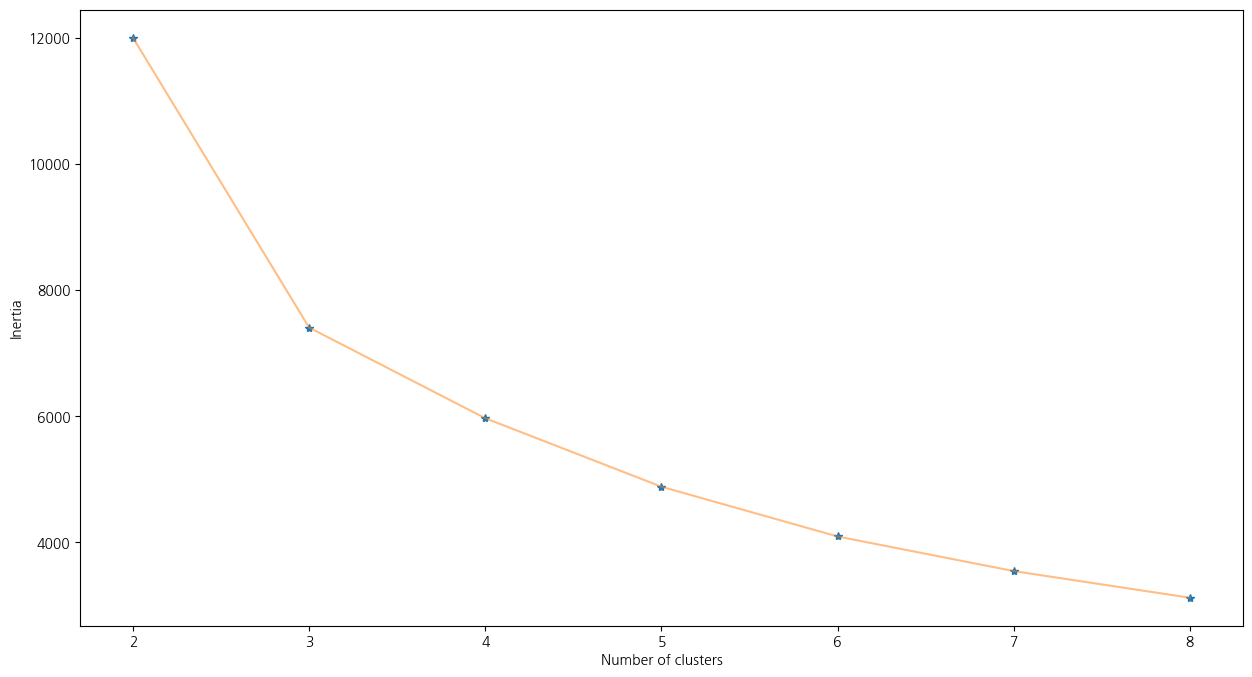

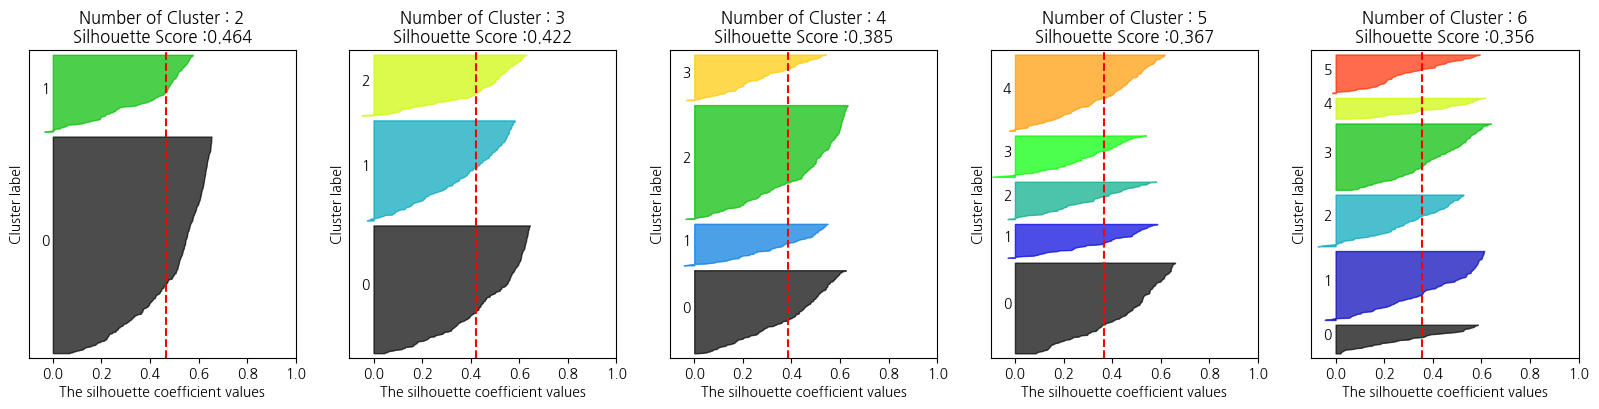

In [319]:
#kmeans 군집화 실시 
from sklearn.cluster import KMeans
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

n_clusters = [2,3,4,5,6,7,8]
change_n_clusters(n_clusters, transformed_data)

def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5,6], transformed_data)

#엘보우 기법으론 정확한 팔꿈치 안보임
#실루엣계수가 최대한 크면서 넓이 크기가 균일한 cluster 3 설정 

In [320]:
#군집 개수 3개로 k-means 

from sklearn.cluster import KMeans

#!pip install threadpoolctl==3.1.0

In [321]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(transformed_data)
transformed_data['labels'] = model.predict(transformed_data)

In [322]:
transformed_data.head()

component,0,1,labels
0,-3.847192,-0.006645,2
1,7.977144,-2.033691,0
2,-4.230826,1.269995,1
3,-3.796745,-0.329851,2
4,-2.551985,4.002563,1


<Axes: xlabel='0', ylabel='1'>

C:\Users\gram\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\gram\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


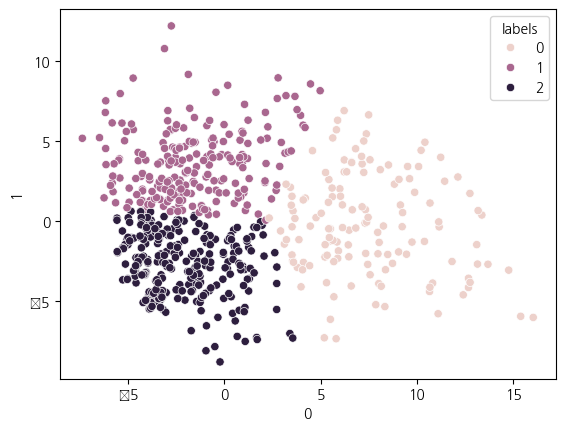

In [323]:
sns.scatterplot(x=0, y=1, hue='labels', data=transformed_data)

In [324]:
#군집화 결과 지정 
mf['labels']=transformed_data.labels

In [325]:
mf['labels'].value_counts()

2    283
1    222
0    135
Name: labels, dtype: int64

In [326]:
mf_f=mf.fillna(0)
mf_f.head()

,Q1,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,HAP,room,food,drink,culture,shopping,treat,beauty,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,weight,Mem,season,labels
0,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,193.43,1,4,2
1,2,1.0,2.0,0.0,4.0,5.0,6.0,0.0,10.0,0.0,12.0,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,244.84,1,4,0
2,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,299.59,2,4,1
3,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,153.27,1,4,2
4,5,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,245.02,1,4,1


In [327]:
#데이터타입 지정
mf_f[['Q1','Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07', 'Q8a10',
       'Q8a11', 'Q8a12','D_SEX','D_AGE','Mem','season']]=mf_f[['Q1','Q8a01', 'Q8a02', 'Q8a03', 'Q8a04', 'Q8a05', 'Q8a06', 'Q8a07', 'Q8a10',
       'Q8a11', 'Q8a12','D_SEX','D_AGE','Mem','season']].astype('object')
mf_f[[ 'HAP', 'room','food','drink','culture','shopping','treat','beauty', 'MQ10_2b01',
       'MQ10_2b02', 'MQ10_2b03', 'MQ10_2b04', 'MQ10_2b05', 'MQ10_2b06']]=mf_f[[ 'HAP', 'room','food','drink','culture','shopping','treat','beauty', 'MQ10_2b01',
       'MQ10_2b02', 'MQ10_2b03', 'MQ10_2b04', 'MQ10_2b05', 'MQ10_2b06']].astype('float64')

In [328]:
mf_f.head()

,Q1,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a10,Q8a11,Q8a12,HAP,room,food,drink,culture,shopping,treat,beauty,D_SEX,D_AGE,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,weight,Mem,season,labels
0,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.00,154.41,0.00,0.0,1158.06,0.0,0.0,2.0,4.0,50.0,0.0,50.0,0.0,0.0,0.0,193.43,1,4,2
1,2,1.0,2.0,0.0,4.0,5.0,6.0,0.0,10.0,0.0,12.0,27.0,0.00,1000.00,0.00,500.0,2000.00,0.0,300.0,2.0,2.0,100.0,0.0,0.0,0.0,0.0,0.0,244.84,1,4,0
2,1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,427.40,267.13,26.71,0.0,1602.75,0.0,0.0,2.0,5.0,10.0,0.0,0.0,0.0,40.0,0.0,299.59,2,4,1
3,2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,540.43,231.61,0.00,38.6,308.82,0.0,0.0,2.0,3.0,0.0,0.0,100.0,0.0,0.0,0.0,153.27,1,4,2
4,5,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,330.00,200.00,0.00,0.0,500.00,2300.0,0.0,1.0,2.0,0.0,0.0,100.0,0.0,0.0,0.0,245.02,1,4,1


In [338]:
mf_f.labels.value_counts()

2    283
1    222
0    135
Name: labels, dtype: int64

In [261]:
mf_f.loc[(mf_f.labels==1)].describe()

,HAP,room,food,drink,culture,shopping,treat,beauty,MQ10_2b01,MQ10_2b02,MQ10_2b03,MQ10_2b04,MQ10_2b05,MQ10_2b06,labels
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,14.201835,451.146972,309.399587,64.318303,12.963761,645.153761,1543.876284,35.940872,18.587156,10.380734,24.724771,4.747706,4.908257,2.866972,1.0
std,16.233197,526.081129,326.288203,208.816885,46.685004,1134.596798,2827.598340,242.480396,26.742400,21.247651,30.171055,12.012114,13.870395,10.065029,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,5.000000,45.412500,100.000000,0.000000,0.000000,105.262500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,8.500000,290.540000,230.815000,0.000000,0.000000,304.330000,225.185000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.0
75%,14.000000,659.990000,397.360000,50.000000,0.000000,735.007500,1515.602500,0.000000,30.000000,10.000000,50.000000,0.000000,0.000000,0.000000,1.0
max,90.000000,3000.000000,2317.100000,2388.230000,390.000000,11812.620000,11564.930000,2285.590000,100.000000,100.000000,100.000000,100.000000,85.000000,80.000000,1.0


In [336]:
#다빈 보내줌
#mf_f.to_csv('final.csv',encoding='utf-8',index=False)

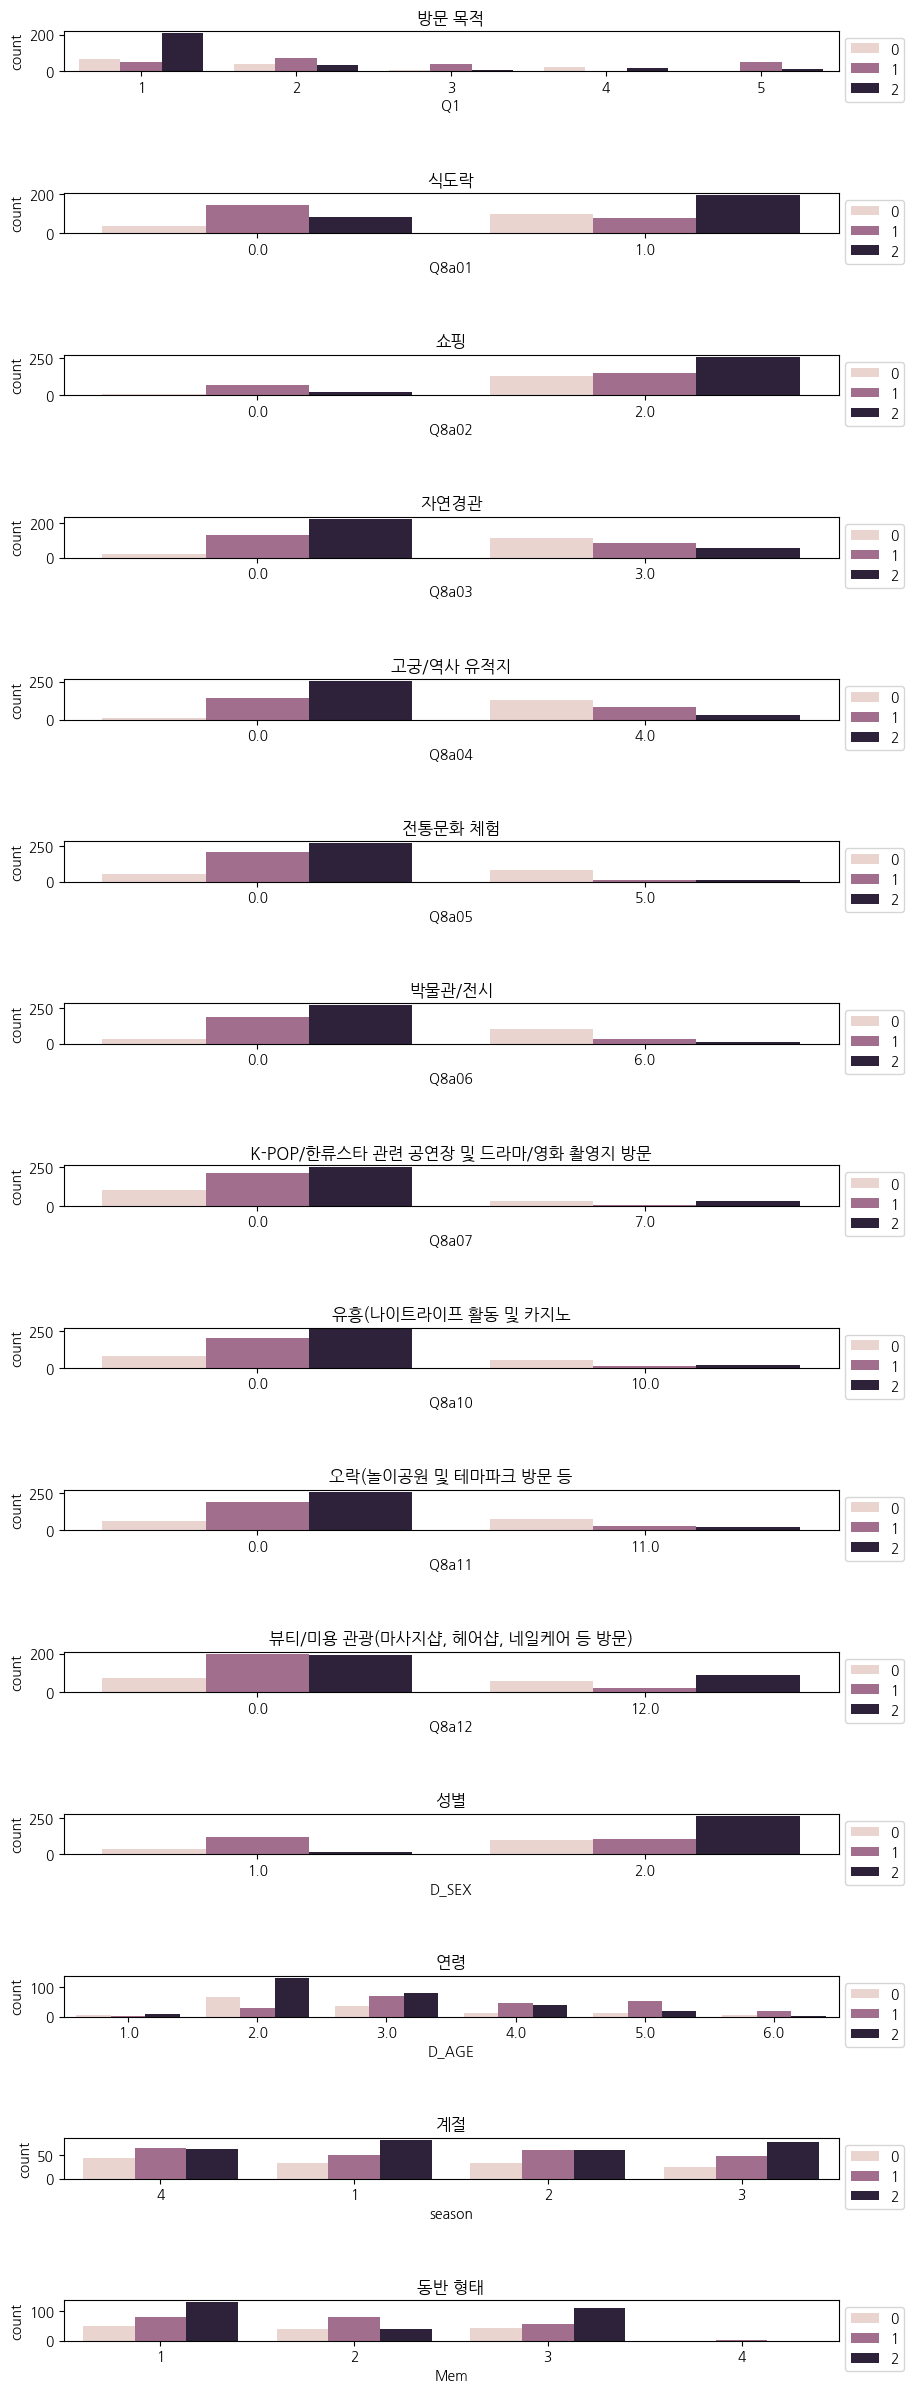

In [331]:
#컬럼별 현황 확인
#for i in mf_f.columns :
#    print(mf_f[[i]].value_counts())

#치료받은 모든 관광객의 EDA
plt.rcParams['font.family'] = 'NanumGothic'

fig, ax = plt.subplots(ncols=1, nrows=15, figsize=(10, 30))


sns.countplot(x='Q1', hue='labels', data=mf_f, ax=ax[0]).set_title('방문 목적')
ax[0].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a01', hue='labels', data=mf_f, ax=ax[1],).set_title('식도락')
ax[1].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a02', hue='labels', data=mf_f, ax=ax[2]).set_title('쇼핑')
ax[2].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a03', hue='labels', data=mf_f, ax=ax[3]).set_title('자연경관')
ax[3].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a04',hue='labels', data=mf_f, ax=ax[4]).set_title('고궁/역사 유적지')
ax[4].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a05', hue='labels', data=mf_f, ax=ax[5]).set_title('전통문화 체험') 
ax[5].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a06', hue='labels', data=mf_f, ax=ax[6]).set_title('박물관/전시')  
ax[6].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a07', hue='labels', data=mf_f,ax=ax[7]).set_title('K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문')  
ax[7].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a10', hue='labels', data=mf_f, ax=ax[8]).set_title('유흥(나이트라이프 활동 및 카지노') 
ax[8].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a11', hue='labels', data=mf_f, ax=ax[9]).set_title('오락(놀이공원 및 테마파크 방문 등') 
ax[9].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Q8a12', hue='labels', data=mf_f, ax=ax[10]).set_title('뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)') 
ax[10].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='D_SEX', hue='labels', data=mf_f, ax=ax[11]).set_title('성별')  
ax[11].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='D_AGE', hue='labels', data=mf_f, ax=ax[12]).set_title('연령') 
ax[12].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='season',hue='labels', data=mf_f,ax=ax[13]).set_title('계절')
ax[13].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='Mem', hue='labels', data=mf_f, ax=ax[14]).set_title('동반 형태')
ax[14].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))



plt.subplots_adjust(hspace=3,wspace=3)
plt.show()




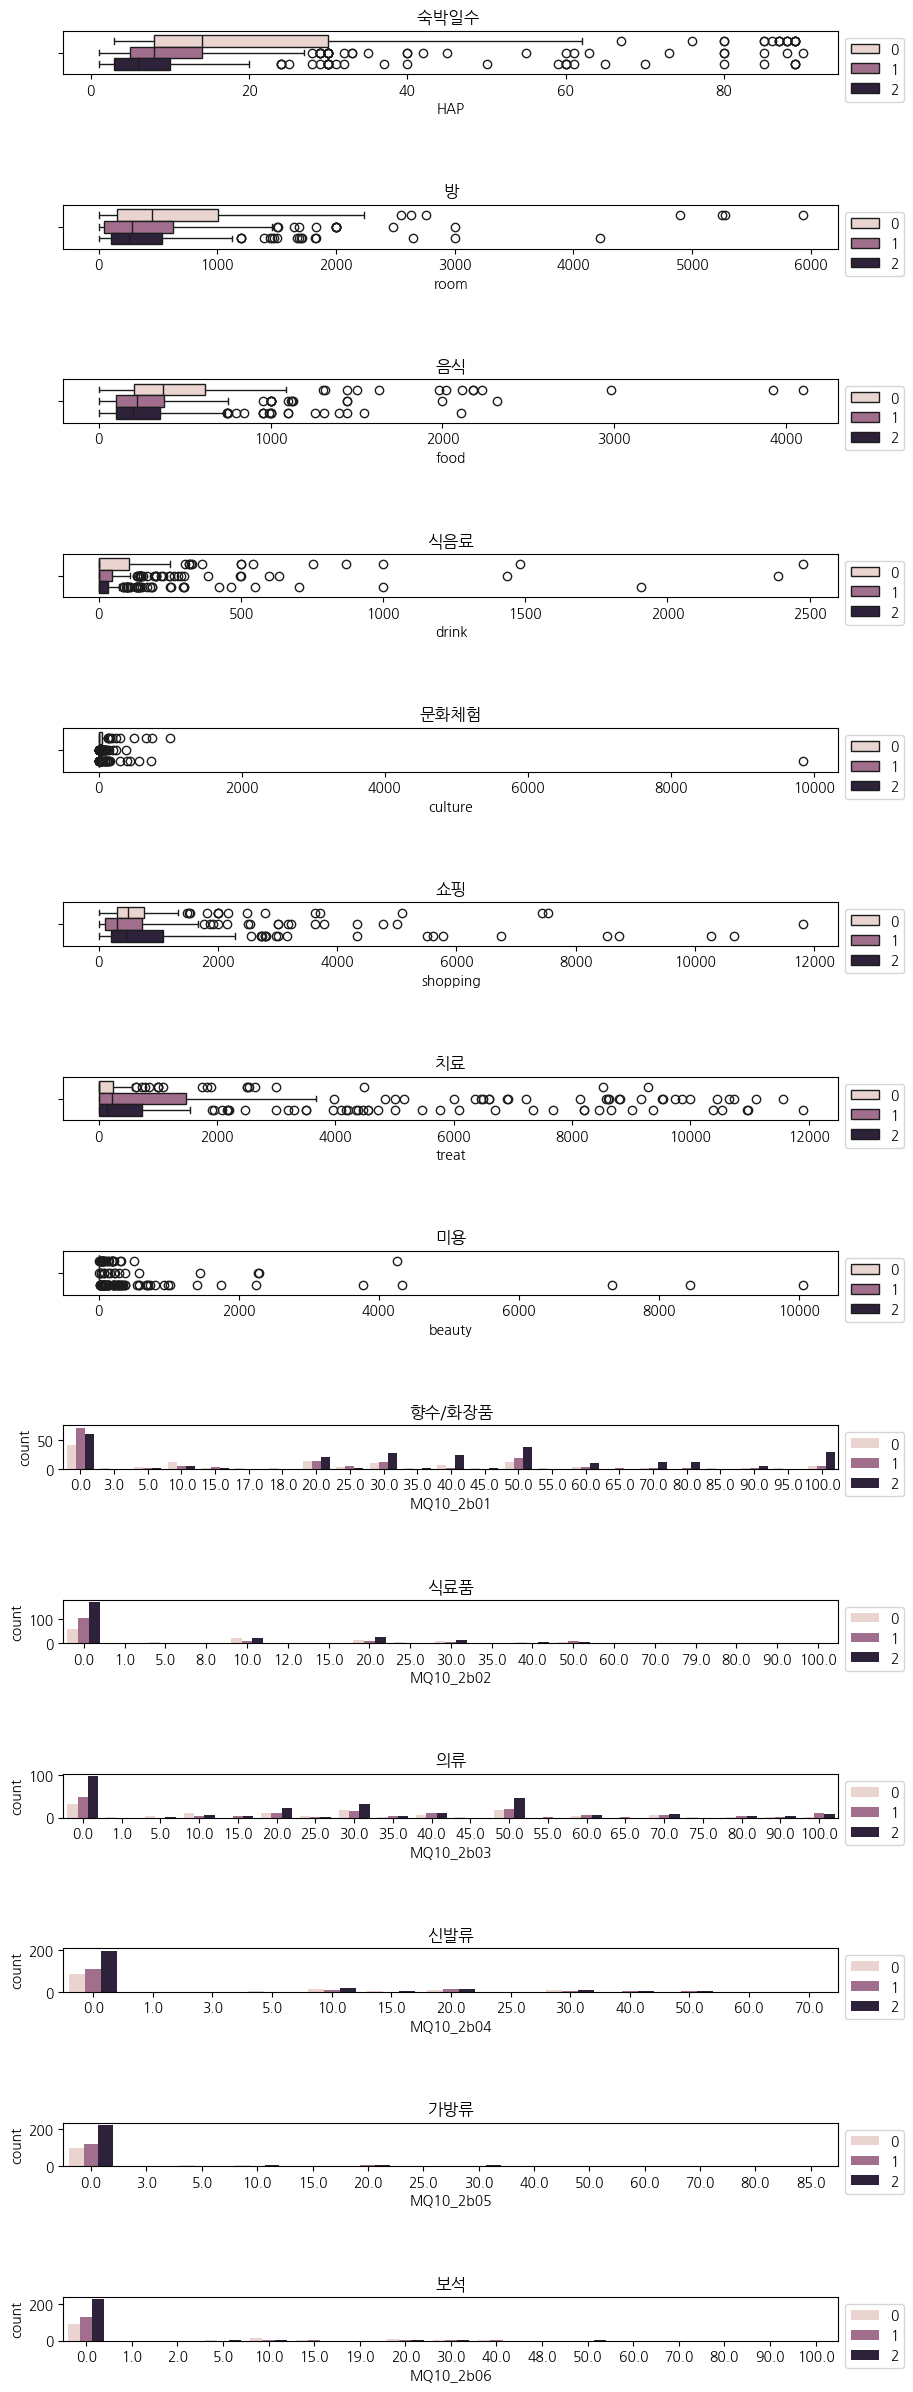

In [337]:
#수치형 변수 시각화 
plt.rcParams['font.family'] = 'NanumGothic'

fig, ax = plt.subplots(ncols=1, nrows=14, figsize=(10, 30))


sns.boxplot(x='HAP', hue='labels', data=mf_f, ax=ax[0]).set_title('숙박일수 ')
ax[0].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.boxplot(x='room', hue='labels', data=mf_f, ax=ax[1]).set_title('방')
ax[1].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.boxplot(x='food', hue='labels', data=mf_f, ax=ax[2]).set_title('음식')
ax[2].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.boxplot(x='drink', hue='labels', data=mf_f, ax=ax[3]).set_title('식음료')
ax[3].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.boxplot(x='culture',hue='labels', data=mf_f, ax=ax[4]).set_title('문화체험')
ax[4].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.boxplot(x='shopping', hue='labels', data=mf_f, ax=ax[5]).set_title('쇼핑') 
ax[5].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.boxplot(x='treat', hue='labels', data=mf_f, ax=ax[6]).set_title('치료')  
ax[6].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.boxplot(x='beauty', hue='labels', data=mf_f,ax=ax[7]).set_title('미용')  
ax[7].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='MQ10_2b01', hue='labels', data=mf_f.loc[mf_f.Q8a02!=0], ax=ax[8]).set_title('향수/화장품') 
ax[8].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='MQ10_2b02', hue='labels', data=mf_f.loc[mf_f.Q8a02!=0], ax=ax[9]).set_title('식료품') 
ax[9].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='MQ10_2b03', hue='labels', data=mf_f.loc[mf_f.Q8a02!=0], ax=ax[10]).set_title('의류') 
ax[10].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='MQ10_2b04', hue='labels', data=mf_f.loc[mf_f.Q8a02!=0], ax=ax[11]).set_title('신발류')  
ax[11].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='MQ10_2b05', hue='labels', data=mf_f.loc[mf_f.Q8a02!=0], ax=ax[12]).set_title('가방류') 
ax[12].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))
sns.countplot(x='MQ10_2b06',hue='labels',data=mf_f.loc[mf_f.Q8a02!=0],ax=ax[13]).set_title('보석')
ax[13].legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 1))


plt.subplots_adjust(hspace=3,wspace=3)
plt.show()
